In [1]:
from select_folders import FolderSelector

In [2]:
folder_selector = FolderSelector()
folder_selector.afficher()


In [3]:
print(folder_selector)

JE COMMENCE PAR UTILISER L'UTILITAIRE DE KERAS.UTILS

In [5]:
import os

In [4]:
# Importation pour la transformation sur les images
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Resizing
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomBrightness
from tensorflow.keras.layers import RandomContrast
from tensorflow.keras.layers import RandomTranslation 

# Importation de l'utilitaire image_dataset_from_directory de Keras
from keras.utils import image_dataset_from_directory

# Importation pour les visualisations
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
os.listdir()

['main.ipynb',
 'over_sampling.ipynb',
 'select_folders.py',
 'under_sampling.ipynb',
 '__pycache__']

In [14]:
data_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"

train_ds = image_dataset_from_directory(data_dir,  
                                validation_split = 0.2,   
                                subset = "training",      
                                seed = 42,             
                                batch_size = 64)

val_ds = image_dataset_from_directory(data_dir,  
                                validation_split = 0.2,   
                                subset = "validation",      
                                seed = 42,             
                                batch_size = 64)

Found 42330 files belonging to 4 classes.
Using 33864 files for training.
Found 42330 files belonging to 4 classes.
Using 8466 files for validation.


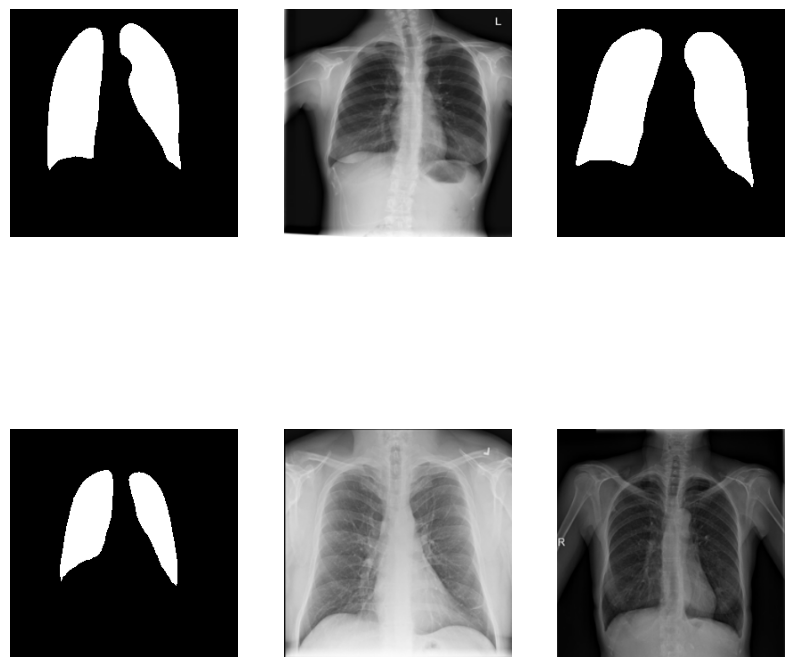

In [15]:

# Définir le nombre d'images à afficher
number_of_images = 6

# Créer une figure pour l'affichage
plt.figure(figsize=(10,10))

# Obtenir un batch d'images depuis train_ds
for images, labels in train_ds.take(1):
    # Afficher les images du batch
    for i in range(number_of_images):
        ax = plt.subplot(2, 3, i + 1) 
        plt.imshow(images[i].numpy().astype("uint8"))  # Convertir l'image en entier pour l'affichage
        plt.axis("off") 

# Afficher les images
plt.show()

In [16]:
import os
import cv2
import numpy as np

# Dossiers
base_dir = "C:/Users/rafae/Documents/GitHub/DS_COVID/data/raw/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset/"
classes = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

for cls in classes:
    images_dir = os.path.join(base_dir, cls, "images")
    masks_dir = os.path.join(base_dir, cls, "masks")
    output_dir = os.path.join(base_dir, cls, "images_masked")
    os.makedirs(output_dir, exist_ok=True)

    for img_name in os.listdir(images_dir):
        img_path = os.path.join(images_dir, img_name)
        mask_path = os.path.join(masks_dir, img_name)
        if os.path.exists(mask_path):
            image = cv2.imread(img_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            # Appliquer le masque (pixels hors masque mis à zéro)
            masked_img = cv2.bitwise_and(image, image, mask=mask)
            cv2.imwrite(os.path.join(output_dir, img_name), masked_img)

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
